In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
pages = [str(i) for i in range(0,361,30)]
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}

In [3]:
titles =[]
urls=[]
reviews=[]
prix=[]
notes =[]

In [4]:
for page in pages:
    response = requests.get('https://www.tripadvisor.com/Hotels-g503710-oa'+ page +'-Hersonissos_Crete-Hotels.html',headers=headers)  
    page_html = BeautifulSoup(response.text, 'html.parser')
    hotel_containers = page_html.find_all('div', class_ ='listing collapsed')
        
    for container in hotel_containers:
        title=container.find('a',{"target":"_blank"})
        t = [titl for titl in title]
        titles.extend(t)
        
        url=container.find('div','listing_title')
        u = ['https://www.tripadvisor.com' + ur['href'] for ur in url]
        urls.extend(u)
        
        review = container.find('div','prw_rup prw_common_rating_and_review_count_with_popup linespace is-shown-at-mobile')
        r=[revie.text.replace(',','') for revie in review]
        reviews.extend(r)
        
        try:
            prices = container.find('div',attrs={'data-sizegroup':"mini-meta-price"})
            prix.append(prices)
        except Exception as e: 
            prices = None
        
        try:
            bubles= container.find_all('a',{'class': re.compile('ui_bubble_rating bubble_\d*')})
            bu = [int(buble['class'][1].strip('bubble_'))/10 for buble in bubles]
            notes.append(bu)
        except Exception as e: 
            bubles = None      

In [5]:
len(notes)

380

In [6]:
len(prix)

380

In [7]:
len(titles)

380

In [8]:
len(urls)

380

In [9]:
urls

['https://www.tripadvisor.com/Hotel_Review-g1191367-d11873244-Reviews-Stella_Island_Luxury_Resort_Spa-Analipsi_Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-Creta_Maris_Beach_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g10796258-d663341-Reviews-Lyttos_Beach_Hotel-Agkisaras_Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g635604-d663320-Reviews-Lofos_Apartments-Piskopiano_Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d8071639-Reviews-Infinity_Blue_Boutique_Hotel_Spa-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g503710-d500649-Reviews-Grand_Hotel_Holiday_Resort-Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g678908-d574989-Reviews-Creta_Blue_Boutique_Hotel_Suites-Koutouloufari_Hersonissos_Crete.html',
 'https://www.tripadvisor.com/Hotel_Review-g678908-d284096-Reviews-Esperides_Resort_Spa-Koutouloufari_Hersonissos_Crete.

In [10]:
len(reviews)

704

In [11]:
new_reviews = []

for a in reviews:
    if a != ' ':
        new_reviews.append(a)

In [12]:
len(new_reviews)

380

# Scraping plusieurs hotels et plusieurs commentaires

In [13]:
def scrap_nb_pages_from_page(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    total_pages = soup.find_all('a',class_='pageNum cx_brand_refresh_phase2')
    nb_pages = [total_page.text for total_page in total_pages]
    last_page = nb_pages[-1]
    convert = int(last_page)
    
    return(convert)

In [14]:
scrap_nb_pages_from_page(urls[10])

36

In [16]:
def scrap_commentaires(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    try: 
        commentaires = soup.findAll('q','IRsGHoPm')
        coms =[commentaire.text for commentaire in commentaires]
    except Exception:
        coms =None
    return(coms)
            

In [58]:
scrap_commentaires(urls[1])

['Amidst the covid situation, the staff take every precaution, the food is excellent, everyone is friendly and the atmosphere is very relaxing. Would recommend to anyone in need to a vacation and will definitely be back!  The ocean and pool views are a blessing and the cool breeze off the Aegean is just devine..',
 'Despite the Corona Times, we felt safe and fantastically treated during our whole stay! We had wonderful weather and had some very needed relaxation! Beautiful hotel, great food and super friendly staff! Can’t wait to hopefully return next year!!!',
 'Thoroughly enjoyed our stay at the Creta Maris. The service was excellent. The food was great. We ate at every restaurant and I must say I was particularly impressed with the food at the Almyra restaurant. Food was incredibly high quality. Special thank you to Dimitris who went above and beyond, making the evening an awesome experience for us both. Please pass on my thanks.  P.s the apple crumble was out of this world. ',
 'Cr

In [22]:
def scrap_notes(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    try:
        bubles =soup.find_all('div','nf9vGX55')
        bu =[int(buble.span['class'][1].strip('bubble_'))/10 for buble in bubles]
    except Exception:
        bubles = None
    return(bu)

In [39]:
def scrap_title(url):
    r =requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    try:
        titles =soup.find_all('div',attrs={'data-test-target':'review-title'})
        t =[title.text for title in titles]
    except Exception:
        titles= None
    return(t)

In [40]:
scrap_title(urls[0])

['Stella Paradise!',
 'Superb',
 'Superb resort',
 'Ultimate luxury experience',
 'Honeymoon...good but room for improvement ']

In [18]:
def pages_comments_hotel(url):
    url_start = url.split("-Reviews-")[0]
    url_end = url.split("-Reviews-")[1]
    print(url_start, url_end)

    nb_pages = scrap_nb_pages_from_page(url)

    url_hotel_reviews = []
    for i in range(nb_pages):
        url_page_hotel = url_start+"-Reviews-or"+str(5*(i))+"-"+url_end
        url_hotel_reviews.append(url_page_hotel)
    return(url_hotel_reviews)

In [66]:
len(urls_pages_0)

109

In [67]:
urls_pages_0 = pages_comments_hotel(urls[0])
#com_Creta_Maris=[]
notes_Stella_Island_Luxury=[]
titles_Stella_Island_Luxury=[]

for url_page in urls_pages_0:
    #coms_Creta_Maris.append(scrap_commentaires(url_page))
    notes_Stella_Island_Luxury.extend(scrap_notes(url_page))
    titles_Stella_Island_Luxury.extend(scrap_title(url_page))   

https://www.tripadvisor.com/Hotel_Review-g1191367-d11873244 Stella_Island_Luxury_Resort_Spa-Analipsi_Hersonissos_Crete.html


In [70]:
len(notes_Stella_Island_Luxury)

543

In [72]:
titles_Stella_Island_Luxury

['Stella Paradise!',
 'Superb',
 'Superb resort',
 'Ultimate luxury experience',
 'Honeymoon...good but room for improvement ',
 'You will never want to leave',
 'The best hotel in crete ',
 'Island life',
 'Beautiful hotel ',
 'Not perfect, but close to it :)',
 'Beautiful ',
 'Wonderful Holiday',
 'Lovely hotel',
 'Absolutely magnificent',
 'Excellent vacation',
 'Fabulous',
 'Stunning resort',
 'PARADISE!!',
 'Much needed and no disappointment',
 'As good as it looks ....',
 'Beautiful Resort',
 'Paradise! (Detailed review)',
 'Fabulous',
 'A slice of Paradise - highly recommend',
 'Stella Island, more than a regular 5 star hotel. Paradise!',
 'Simply Stunning',
 'Absolutely Fabulous Hotel',
 'The good reviews are well deserved',
 'Paradise is bigger now :)',
 'Absolutely Fantastic ',
 'Simply perfection!!!',
 '5* honeymoon stay with 5* service',
 'Paradise in Crete!',
 'La Parilla - AMAZING',
 'Impressions of "Stella Island Resort", Crete',
 'Slice of Heaven',
 'Everything was amaz

In [60]:
urls_pages = pages_comments_hotel(urls[1])
#com_Creta_Maris=[]
notes_Creta_Maris=[]
titles_Creta_Maris=[]

for url_page in urls_pages:
    #coms_Creta_Maris.append(scrap_commentaires(url_page))
    notes_Creta_Maris.extend(scrap_notes(url_page))
    titles_Creta_Maris.extend(scrap_title(url_page))   

https://www.tripadvisor.com/Hotel_Review-g503710-d248492 Creta_Maris_Beach_Resort-Hersonissos_Crete.html


In [61]:
len(notes_Creta_Maris)

2204

In [63]:
titles_Creta_Maris

['Vacation amidst Chaos',
 'Wonderful Time',
 'What an experience!',
 'A great stay',
 'A lovely place with great',
 'Great but some annoying niggles',
 'Fantastic Week at Creta w we',
 'Almyra restaurant',
 'It was OK',
 'Excellent holiday',
 'Unbelievable service',
 'THANK YOU CRETA MARIS',
 'Creta Maris & Almira Restaurant ',
 'Beautiful hotel ',
 'Great place to stay',
 'Almyra Restaurant ',
 'All inclusive holiday ',
 'Beautiful hotel',
 'Excellent time so far!',
 'Creta Maris Beach Resort',
 'Safe and Warm Welcome ',
 'Simply amazing',
 'All inclusive excellence',
 'Not for couples',
 'Jolleyhols',
 'Spa',
 'Fantastic holiday',
 'Outstanding With excellent service, v nice rooms and great memories',
 'Amazing holiday',
 'Holiday 2020 ',
 'Hammam Spa',
 'A place in paradise',
 'Excellent stay on the island of Crete',
 'Excellent',
 'Read this before you go.',
 'Great Resort',
 'Almyra Restaurant',
 'Spa time',
 'Thanks JD',
 'Aegeo Spa',
 'SPA time ',
 'Cretan hospitality from Aege

In [79]:
urls_pages_2 = pages_comments_hotel(urls[2])
#com_Creta_Maris=[]
notes_Lyttos_Beach_Hotel=[]
titles_Lyttos_Beach_Hotel=[]

for url_page in urls_pages_2:
    #coms_Creta_Maris.append(scrap_commentaires(url_page))
    notes_Lyttos_Beach_Hotel.extend(scrap_notes(url_page))
    titles_Lyttos_Beach_Hotel.extend(scrap_title(url_page))   

https://www.tripadvisor.com/Hotel_Review-g10796258-d663341 Lyttos_Beach_Hotel-Agkisaras_Hersonissos_Crete.html


In [80]:
len(notes_Lyttos_Beach_Hotel)

328

In [82]:
titles_Lyttos_Beach_Hotel

['family hoilday',
 'They make you feel special in a wonderful and relaxing environment!',
 'Covid getaway to the best hotel in Crete!!!!!!',
 'Best Holiday in GREEce ',
 'Wonderful! Lyttos beach is truly a complete ‘All Inclusive Experience’!',
 'Definitely not for couples',
 'Amazing hotel & fantastic holiday ',
 'Lovely hotel and super kids entertainment ',
 'Great holiday.  More than lived up to expectations',
 '8 days in August - Family fun and Dealing with Private Pool envy',
 'Relaxing two weeks',
 'Fabulous Holiday',
 'Family Holiday',
 'Gorgeous hotel',
 'Fun experience',
 'Pretty good.',
 'Honest full review',
 'Nice hotel - especially for people interested in keep moving during vacations',
 'Perfect vacation',
 'Great family holiday',
 'Moderate for this price',
 'Very good but there some cons...',
 'Perfect Holidays',
 'Private pool to cold to use, all drinks are in disposable plastic cups',
 'Dead in down season',
 'Less food for same price',
 'Beautiful place',
 'Not idea

In [106]:
urls_pages_3 = pages_comments_hotel(urls[3])
#com_Creta_Maris=[]
notes_Lofos_Apartments=[]
titles_Lofos_Apartments=[]

for url_page in urls_pages_3:
    #coms_Creta_Maris.append(scrap_commentaires(url_page))
    notes_Lofos_Apartments.extend(scrap_notes(url_page))
    titles_Lofos_Apartments.extend(scrap_title(url_page))   

https://www.tripadvisor.com/Hotel_Review-g635604-d663320 Lofos_Apartments-Piskopiano_Hersonissos_Crete.html


In [132]:
notes_Lofos_Apartments

[5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 4.0]

In [115]:
titles_Lofos_Apartments

['Highly Recommended',
 'Gem of a place ',
 'Amazing holiday! 10/10',
 'Great Holiday',
 'The warmest welcome awaits',
 '3rd time.. gets better every year',
 'Lofos August 2020',
 'Holiday ',
 'Beautiful place',
 'Another Wonderful Holiday',
 'Fantastic accommodation, great experience.',
 'Just an insight..........',
 'Mumtaz hasan husain',
 'Lovely friendly apartment complex with stunning views ',
 'Family Holiday',
 'Something special',
 'What Can I say.. 5*',
 'Fabulous',
 'Fantastic',
 'Thank you for the best holiday 🌞💙',
 'Top rate moderately priced accommodation',
 'Fantastic',
 'Brilliant.',
 'Wonderful holiday',
 'A 5 star rating is not enough!',
 'A little paradise on the hill',
 'Amazing place and super staff',
 'FABULOUS, FABULOUS, FABULOUS',
 'Little gem',
 'Great customer service ',
 'Lovely place to stay',
 'Arrive as a guest, leave as a friend',
 'Good',
 'Family holiday',
 'Excellent',
 'Wonderful Apartments',
 'Amazing holiday!!',
 'Happy Hols.',
 'Lovely friendly mode

In [120]:
titles = titles_Stella_Island_Luxury+titles_Creta_Maris+titles_Lyttos_Beach_Hotel+titles_Lofos_Apartments

In [121]:
len(titles)

2879

In [122]:
notes = notes_Stella_Island_Luxury+notes_Creta_Maris+notes_Lyttos_Beach_Hotel+notes_Lofos_Apartments

In [123]:
len(notes)

2884

# Dataframe 1ere page urls commentaires 

In [124]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(zip(notes,titles)),
              columns=['notes','reviews'])

In [125]:
df.head()

,notes,reviews
0,5.0,Stella Paradise!
1,5.0,Superb
2,5.0,Superb resort
3,5.0,Ultimate luxury experience
4,4.0,Honeymoon...good but room for improvement


In [126]:
df = df[df['notes'] != '3']

C:\Users\lina.saidane\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 2878
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   notes    2879 non-null   float64
 1   reviews  2879 non-null   object 
dtypes: float64(1), object(1)
memory usage: 67.5+ KB


In [128]:
def get_class(notes):
    score = int(notes)
    if score > 3:
        return 1
    else:
        return 0
    
# Transform the number of stars into Good and Bad.
df['true_category'] = df['notes'].apply(get_class)

In [129]:
df = df[['reviews', 'true_category']]

In [130]:
df['true_category'].value_counts()

1    2706
0     173
Name: true_category, dtype: int64

Percentage for default

1    93.24
0     6.76
Name: true_category, dtype: float64


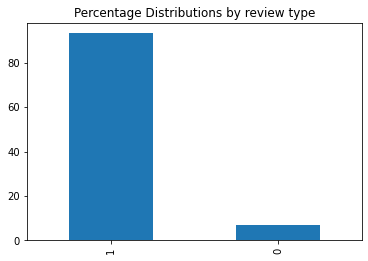

In [131]:
#représentation graphique en pourcentage des happy et not happy 

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df2.true_category.value_counts(normalize=True)*100,2))
round(df2.true_category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [41]:
# Apply cleaning
import re
import string

#conversion en minuscule, suppression des nombres, de la ponctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [42]:
#apply the function
df2['cleaned_fullcontent'] = pd.DataFrame(df2.reviews.apply(cleaned1))
df2.head(10)

,reviews,true_category,cleaned_fullcontent
0,We stayed in a few 5 star resorts in Crete in ...,1,we stayed in a few star resorts in crete in o...
1,We had a ten night vacation to this lovely hot...,1,we had a ten night vacation to this lovely hot...
2,We had an amazing week at Stella Island. From ...,1,we had an amazing week at stella island from t...
3,Fantastic hotel really enjoyed our stay. We ha...,1,fantastic hotel really enjoyed our stay we had...
4,We spent 8 days in Private Pool Villa. The se...,1,we spent days in private pool villa the serv...
5,I would highly recommend this hotel. Visited w...,1,i would highly recommend this hotel visited wi...
6,Arrived late 1 September. Hotel spotless and a...,1,arrived late september hotel spotless and adh...
7,From roof top bars to pools to all of the rest...,1,from roof top bars to pools to all of the rest...
8,last day of a 6 day holiday. After having 5 ho...,0,last day of a day holiday after having holid...
9,From start to finish a lovely holiday.We had a...,1,from start to finish a lovely holidaywe had an...


In [43]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)#supprime les apostrophes et autres symboles
    text = re.sub('\n', '', text) #suppression des sauts de lignes
    return text

cleaned2 = lambda x: text_clean_2(x)

In [44]:
# application de la 2e fonction de nettoyage
df2['cleaned_fullcontent_new'] = pd.DataFrame(df2['cleaned_fullcontent'].apply(cleaned2))

In [47]:
#séparation du dataframe en deux : avec d'un coté le dataframe test et le train (70/30)

from sklearn.model_selection import train_test_split

dataset = df2
dftrain, dftest = train_test_split(dataset,test_size = 0.1, random_state = 225)

print('df_train :', len(dftrain))
print('df_test  :', len(dftest))


df_train : 1326
df_test  : 148


# SickitLearn : machine learning

In [78]:
from sklearn.feature_extraction.text import CountVectorizer 
#algorithme d'extraction de caractèristique de sickitLearn,module lié au texte pour faire le bag of words (countvectorizer) 
#(on modifie nos mots en vecteur)

In [79]:
count_vect = CountVectorizer() #on instancie le module

In [80]:
count_vect = CountVectorizer(max_features=1500)#On peut ajouter des paramètres
#max_features : garde que les mots les plus fréquents 

In [81]:
# calcul tous les vecteurs et applique le bag of words(qui décrit l'occurrence de mots dans un document)
X_train_counts = count_vect.fit_transform(dftrain.cleaned_fullcontent_new)

# fit fonction qui permet de faire l'apprentissage t de lier le modèle aux données
# transform applique les transformations 
#et il existe une fonction qui fait les deux en meme temps 


In [82]:
X_train_counts #dans mon jeu de données, j'ai 9260 mots
# mes vecteurs, pour chacun des mots fait une taille de 9260
# sparse matrix stocke mieux les objets dans la mémoire dontya beaucoup de 0 


<1326x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 94103 stored elements in Compressed Sparse Row format>

In [83]:
X_train_counts.toarray()#affichage de ma matrice 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 3, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
X_train_counts.toarray().shape
#chaque phrases a été transformée en vecteurs

(1326, 1500)

# Définition du modèle 

In [85]:
from sklearn.linear_model import LogisticRegression #modèle via la régréssion logistique

# pour tous les modèles de régression binomiale, 
#il s'agit de modéliser au mieux un modèle mathématique simple 
#à des observations réelles nombreuses.
#Cela associe mes vecteurs à ma colonne binomiale à savoir "true_category"

In [86]:
classifieur = LogisticRegression() 

## Apprentissage du modèle

In [87]:
classifieur.fit(X_train_counts,dftrain.true_category)

C:\Users\lina.saidane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Prédiction sur le jeu de test

In [88]:
X_test_counts = count_vect.transform(dftest.cleaned_fullcontent_new)
#Transform parce que mon jeu de données à déjà appris

In [89]:
predictions = classifieur.predict(X_test_counts)

In [94]:
predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [98]:
print(dftest.true_category.tolist())

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [90]:
predictions.shape

(148,)

In [100]:
#comparer la prédiction avec la réalité
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, dftest.true_category))
print("Precision : ", precision_score(predictions, dftest.true_category, average = 'weighted'))
print("Recall : ", recall_score(predictions, dftest.true_category, average = 'weighted'))

Accuracy :  0.8986486486486487
Precision :  0.9191753017839974
Recall :  0.8986486486486487


In [107]:
example = ["i stayed two "]
example = np.asarray(example)
example = example.reshape(-1, 1)
result = classifieur.predict(example)

print(result)

C:\Users\lina.saidane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: X has 1 features per sample; expecting 1500

# Dataframe and cleaning URLS page principale

In [12]:
import pandas as pd
import numpy as np

df = pd.DataFrame(list(zip(titles,notes,new_reviews,prix,urls)),
              columns=['title','notes','reviews','price','urls'])

In [13]:
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

In [14]:
df["price"] =df["price"].apply(try_join)

In [15]:
df["notes"]=df["notes"].apply(try_join)

In [16]:
df

,title,notes,reviews,price,urls
0,Stella Island Luxury Resort & Spa,5.0,760 reviews,€433,https://www.tripadvisor.com/Hotel_Review-g1191...
1,Creta Maris Beach Resort,4.5,4775 reviews,€242,https://www.tripadvisor.com/Hotel_Review-g5037...
2,Stella Palace Resort & Spa,4.5,2623 reviews,€145,https://www.tripadvisor.com/Hotel_Review-g1191...
3,Nana Princess,5.0,207 reviews,€281,https://www.tripadvisor.com/Hotel_Review-g5037...
4,Lyttos Beach Hotel,4.5,1246 reviews,€156,https://www.tripadvisor.com/Hotel_Review-g1079...
...,...,...,...,...,...
355,Aqua Sun Village,2.5,19 reviews,NaN,https://www.tripadvisor.com/Hotel_Review-g6789...
356,Irene Village Hotel,2.5,51 reviews,NaN,https://www.tripadvisor.com/Hotel_Review-g5037...
357,Greta Beach,2.5,13 reviews,NaN,https://www.tripadvisor.com/Hotel_Review-g1894...
358,Viva Apartments,1.5,15 reviews,NaN,https://www.tripadvisor.com/Hotel_Review-g5037...


In [17]:
pd.set_option('display.max_colwidth',-1)

C:\Users\lina.saidane\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [18]:
df["price"]=df['price'].str.replace('€','')
df["reviews"]=df['reviews'].str.replace('reviews','')
df["reviews"]=df['reviews'].str.replace('review','')

In [19]:
import numpy as np

def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [20]:
df.dtypes

title      object
notes      object
reviews    object
price      object
urls       object
dtype: object

In [21]:
df["reviews"] =df["reviews"].apply(float)
df["notes"] =df["notes"].apply(f)

In [22]:
df['price']=df['price'].apply(f)

In [23]:
df.dtypes

title      object 
notes      float64
reviews    float64
price      float64
urls       object 
dtype: object

In [24]:
df

,title,notes,reviews,price,urls
0,Stella Island Luxury Resort & Spa,5.0,760.0,433.0,https://www.tripadvisor.com/Hotel_Review-g1191367-d11873244-Reviews-Stella_Island_Luxury_Resort_Spa-Analipsi_Hersonissos_Crete.html
1,Creta Maris Beach Resort,4.5,4775.0,242.0,https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-Creta_Maris_Beach_Resort-Hersonissos_Crete.html
2,Stella Palace Resort & Spa,4.5,2623.0,145.0,https://www.tripadvisor.com/Hotel_Review-g1191367-d1220568-Reviews-Stella_Palace_Resort_Spa-Analipsi_Hersonissos_Crete.html
3,Nana Princess,5.0,207.0,281.0,https://www.tripadvisor.com/Hotel_Review-g503710-d13151709-Reviews-Nana_Princess-Hersonissos_Crete.html
4,Lyttos Beach Hotel,4.5,1246.0,156.0,https://www.tripadvisor.com/Hotel_Review-g10796258-d663341-Reviews-Lyttos_Beach_Hotel-Agkisaras_Hersonissos_Crete.html
...,...,...,...,...,...
355,Aqua Sun Village,2.5,19.0,NaN,https://www.tripadvisor.com/Hotel_Review-g678908-d17378907-Reviews-Aqua_Sun_Village-Koutouloufari_Hersonissos_Crete.html
356,Irene Village Hotel,2.5,51.0,NaN,https://www.tripadvisor.com/Hotel_Review-g503710-d2661032-Reviews-Irene_Village_Hotel-Hersonissos_Crete.html
357,Greta Beach,2.5,13.0,NaN,https://www.tripadvisor.com/Hotel_Review-g1894069-d12221316-Reviews-Greta_Beach-Anissaras_Hersonissos_Crete.html
358,Viva Apartments,1.5,15.0,NaN,https://www.tripadvisor.com/Hotel_Review-g503710-d4942048-Reviews-Viva_Apartments-Hersonissos_Crete.html


In [25]:
pd.set_option("display.precision", 2)
df.fillna(df.mean(), inplace=True)
df

,title,notes,reviews,price,urls
0,Stella Island Luxury Resort & Spa,5.00,760.0,433.00,https://www.tripadvisor.com/Hotel_Review-g1191367-d11873244-Reviews-Stella_Island_Luxury_Resort_Spa-Analipsi_Hersonissos_Crete.html
1,Creta Maris Beach Resort,4.50,4775.0,242.00,https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-Creta_Maris_Beach_Resort-Hersonissos_Crete.html
2,Stella Palace Resort & Spa,4.50,2623.0,145.00,https://www.tripadvisor.com/Hotel_Review-g1191367-d1220568-Reviews-Stella_Palace_Resort_Spa-Analipsi_Hersonissos_Crete.html
3,Nana Princess,5.00,207.0,281.00,https://www.tripadvisor.com/Hotel_Review-g503710-d13151709-Reviews-Nana_Princess-Hersonissos_Crete.html
4,Lyttos Beach Hotel,4.50,1246.0,156.00,https://www.tripadvisor.com/Hotel_Review-g10796258-d663341-Reviews-Lyttos_Beach_Hotel-Agkisaras_Hersonissos_Crete.html
...,...,...,...,...,...
355,Aqua Sun Village,2.50,19.0,78.33,https://www.tripadvisor.com/Hotel_Review-g678908-d17378907-Reviews-Aqua_Sun_Village-Koutouloufari_Hersonissos_Crete.html
356,Irene Village Hotel,2.50,51.0,78.33,https://www.tripadvisor.com/Hotel_Review-g503710-d2661032-Reviews-Irene_Village_Hotel-Hersonissos_Crete.html
357,Greta Beach,2.50,13.0,78.33,https://www.tripadvisor.com/Hotel_Review-g1894069-d12221316-Reviews-Greta_Beach-Anissaras_Hersonissos_Crete.html
358,Viva Apartments,1.50,15.0,78.33,https://www.tripadvisor.com/Hotel_Review-g503710-d4942048-Reviews-Viva_Apartments-Hersonissos_Crete.html


In [26]:
print(df.isna().sum())

title      0
notes      0
reviews    0
price      0
urls       0
dtype: int64


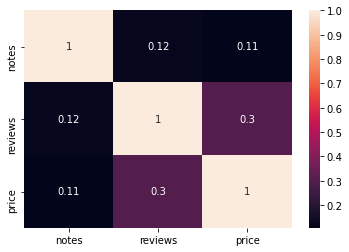

In [27]:
#visualisation des colonnes sous forme de matrice de correlation
#quelle data est corréelée avec qui

import seaborn as sea
import matplotlib.pyplot as plt
import pandas as pd

corrMatrix = df.corr()
sea.heatmap (corrMatrix, annot = True)
plt.show()

In [28]:
df.urls

0      https://www.tripadvisor.com/Hotel_Review-g1191367-d11873244-Reviews-Stella_Island_Luxury_Resort_Spa-Analipsi_Hersonissos_Crete.html
1      https://www.tripadvisor.com/Hotel_Review-g503710-d248492-Reviews-Creta_Maris_Beach_Resort-Hersonissos_Crete.html                   
2      https://www.tripadvisor.com/Hotel_Review-g1191367-d1220568-Reviews-Stella_Palace_Resort_Spa-Analipsi_Hersonissos_Crete.html        
3      https://www.tripadvisor.com/Hotel_Review-g503710-d13151709-Reviews-Nana_Princess-Hersonissos_Crete.html                            
4      https://www.tripadvisor.com/Hotel_Review-g10796258-d663341-Reviews-Lyttos_Beach_Hotel-Agkisaras_Hersonissos_Crete.html             
                                                                ...                                                                       
355    https://www.tripadvisor.com/Hotel_Review-g678908-d17378907-Reviews-Aqua_Sun_Village-Koutouloufari_Hersonissos_Crete.html           
356    https://www.tripadvi